In [ ]:
import os
import time
from basic_parameters import basic_params
from process import processing_and_save
timer = time.time()
os.system("mpiexec -n 6 python3 base_model.py")
print("Simulation is finished!")
print(time.time() - timer)

file = basic_params["file_results"]
processing_and_save(file)


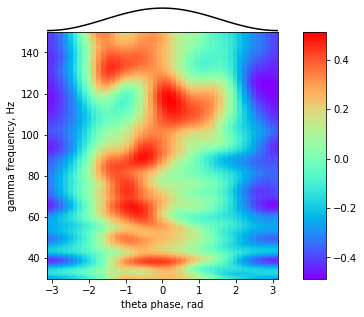

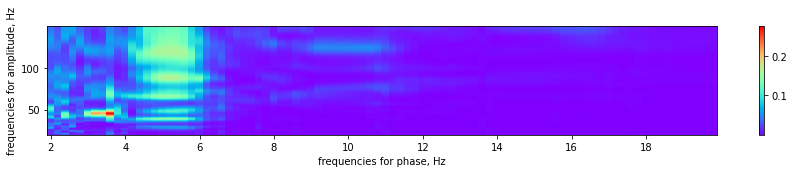

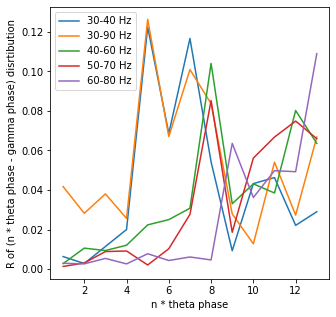

In [4]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15, 2)
# from basic_parameters import basic_params
import plot_result as my_plot

filepath = "../../Data/CA1_simulation/test.hdf5" #  basic_params["file_results"]
# my_plot.plot_v(filepath)

# my_plot.plot_spike_raster(filepath)
# my_plot.plot_lfp(filepath)
# my_plot.plot_phase_disrtibution(filepath)
my_plot.plot_phase_by_amplitude_coupling(filepath)
# my_plot.plot_current_source_density(filepath, "theta")
my_plot.plot_modulation_index(filepath)
my_plot.plot_nm_phase_phase_coupling(filepath)
# my_plot.plot_v_vs_pyr_lfp(filepath)
# my_plot.plot_phase_precession(filepath)

In [2]:
from process import processing_and_save

file = "../../Data/CA1_simulation/test.hdf5"
processing_and_save(file)



/usr/local/lib/python3.8/dist-packages/elephant/pandas_bridge.py:21: DeprecationWarning: pandas_bridge module will be removed in Elephant v0.8.x
  warnings.warn("pandas_bridge module will be removed in Elephant v0.8.x",


In [ ]:
import numpy as np
# from scipy.signal import hilbert
import matplotlib.pyplot as plt
from matplotlib import gridspec
import h5py
# from basic_parameters import basic_params
# import processingLib as proclib
plt.rcParams["figure.figsize"] = (15, 2)

# import plot_result as my_plot
neuron_order = ["pyr", "pvbas", "cckbas", "olm", "bis", "aac", "ivy", "ngf", "sca", "mec", "ca3_spatial", "ca3_non_spatial", "msteevracells", "msach"]

# neuron_order = ["pvbas", "ca3_spatial"]

filepath = "../../Data/CA1_simulation/test.hdf5"   # basic_params["file_results"]
# my_plot.plot_spike_raster(file)

with h5py.File(filepath, 'r') as h5file:
    t0 = h5file["time"][0]
    t1 = h5file["time"][-1]
    
    lfp = h5file["extracellular/electrode_1/lfp/origin_data/channel_1"][:]
    t = np.linspace(t0, t1, lfp.size)
   
    raster_group = h5file["extracellular/electrode_1/firing/origin_data"]
                
    fig = plt.figure(figsize=(15, 30))
        
    neurons_num = len(neuron_order)
    gs = gridspec.GridSpec(neurons_num+1, 1)
    
    axes = plt.subplot(gs[0])
    axes.plot(t, lfp)
    axes.set_xlim(t0, t1)

    for celltype_idx, celltype in enumerate(neuron_order):
   
        try:
            celltype_group = raster_group[celltype]
            axes = plt.subplot(gs[celltype_idx+1])
           
            for sp_idx, (cell_key, firing) in enumerate(celltype_group.items()):
                sp_idx += 1
                axes.scatter(firing,  np.zeros(firing.size) + sp_idx, s=1.2, color="red" )

            axes.set_ylim(1, sp_idx)
            axes.set_xlim(t0, t1)
            axes.set_ylabel(celltype, rotation='horizontal', labelpad=20)

            if celltype_idx == len(neuron_order) - 1:
                axes.set_xlabel("time, ms")
            else:
                axes.tick_params(labelbottom=False, bottom=False)
        except KeyError:
            continue
fig.tight_layout()
plt.show()

In [ ]:
print("hello")

169
177
179
183
192
213
221
230
242
247
254
255
257
258
259
261
268
269
273
276
281
285
290
291
305
306
311
320
328
349
352
353
366
372
377
380
382
390
391
398
399
402
411
415
425
426
430
450
453
457
459
467
468
473
475
481
491
503
508
509
511
543
558
568
569
570
572
592
616
617
623
639
643
670
686
691
695
710
723
743
753
754
759
769
797
805
807
809
825
829
831
832
845
853
856
875
882
883
891
904
905
918
922
923
924
935
938
940
941
946
954
960
964
965
976
977
978
981
982
986
987
988
995
998
1013
1016
1017
1018
1019
1020
1023
1030
1060
1067
1068
1069
1073
1099
1116
1119
1122
1123
1128
1154
1170
1175
1199
1200
1219
1222
1242
1243
1244
1246
1248
1260
1284
1295
1305
1332
1336
1353
1354
1379
1392
1395
1408
1416
1437
1467
1489
1490
1525
1528
1530
1535
1539
1543
1544
1554
1565
1568
1569
1572
1585
1589
1591
1593
1595
1614
1633
1636
1642
1646
1649
1653
1659
1660
1676
1681
1682
1690
1696
1697
1702
1705
1716
1725
1732
1733
1734
1744
1756
1761
1775
1784
1785
1788
1795
1796
1799
1801
1815
1821
1822

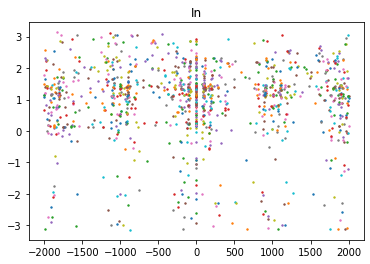

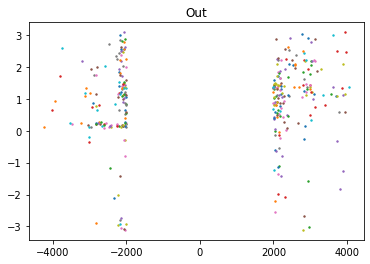

In [1]:
import numpy as np
# from scipy.signal import hilbert
import matplotlib.pyplot as plt
import h5py

filepath = "../../Data/CA1_simulation/test.hdf5" 

with h5py.File(filepath, 'r') as h5file:
    sampling_rate = h5file["extracellular/electrode_1/lfp/origin_data"].attrs["SamplingRate"]
    # theta_signal = h5file["extracellular/electrode_1/lfp/processing/bands/channel_1/theta"][:]
    t = h5file["time"][:]
    
    theta_phases = 2*np.pi*0.005*t    # np.angle( hilbert(theta_signal) )
    theta_phases = theta_phases%(2*np.pi)
    theta_phases[theta_phases>np.pi] -= 2*np.pi
    theta_signal = np.cos(theta_phases)
    
    #plt.plot(t, theta_phases)
    

    firing_group = h5file["extracellular/electrode_1/firing/origin_data/pyr"] # pyr !!!!
    sampling_rate *= 0.001

    fig_in, ax_in = plt.subplots()
    fig_out, ax_out = plt.subplots()


    ax_in.set_title("In")
    ax_out.set_title("Out")

    for neuron_idx, firing in enumerate(firing_group.values()):
        if firing.size < 4: continue

        indexes = (np.floor(firing * sampling_rate) - 1).astype(np.int)

        place_center = np.median(firing)

        firing_during_place = firing - place_center

        #if np.std(firing_during_place) > 5000: continue

        is_inside = np.abs(firing_during_place) < 500
        phases_during_place = theta_phases[indexes]

        firing_inside = firing_during_place[is_inside]
        phases_inside = phases_during_place[is_inside]

        ax_in.scatter(firing_inside, phases_inside, s=2)

        is_outside = np.logical_not(is_inside)
        firing_outside = firing_during_place[is_outside]
        phases_outside = phases_during_place[is_outside]

        ax_out.scatter(firing_outside, phases_outside, s=2)
        print(neuron_idx)


    plt.show()

In [ ]:
duraction = 900
step = 1000
ndurs = int(duraction / step)
last_dur = duraction % step
for i in range(ndurs):
    print(step)
print(last_dur)